In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,precision_score
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/gaurm/Desktop/MACHINE LEARNING/UnniAcco/bank-marketing-uci/bank.csv")
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [3]:
data = pd.read_csv("C:/Users/gaurm/Desktop/MACHINE LEARNING/UnniAcco/bank-marketing-uci/bank.csv",sep = ";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['y'].value_counts()/data.shape[0]

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [10]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [8]:
data.shape

(4521, 17)

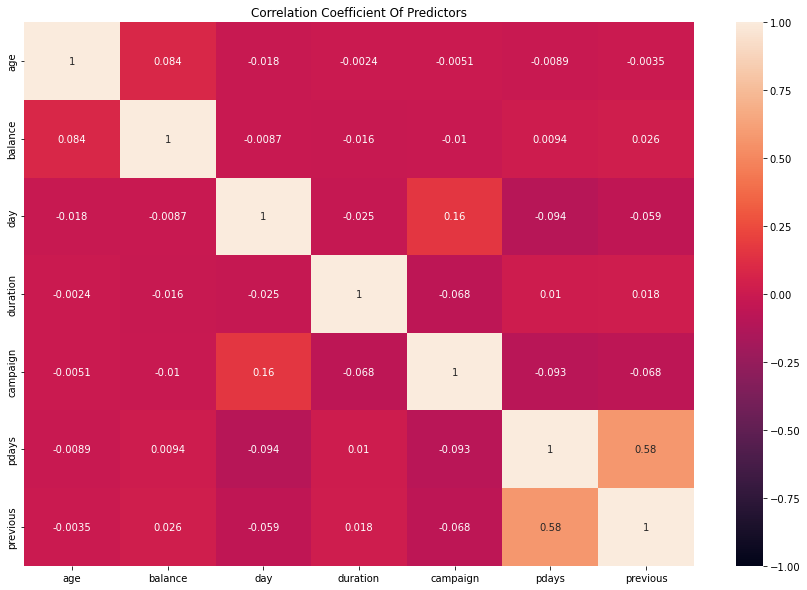

In [11]:
# set figure size
plt.figure(figsize=(15,10))
# generate heatmap
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [12]:
data.drop(columns=["age"],inplace=True)

In [13]:
data.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [40]:
obj_col=data.select_dtypes(include='object').columns
print(obj_col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2=data.copy()
for col in obj_col:
    df2[col]=le.fit_transform(data[col])

In [42]:
df2

,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,day_of_year
0,10,1,0,0,1787,0,0,0,1.316667,1,-1,0,3,0,292
1,7,1,1,0,4789,1,1,0,3.666667,1,339,4,0,0,131
2,4,2,2,0,1350,1,0,0,3.083333,1,330,1,0,0,106
3,4,1,2,0,1476,1,1,2,3.316667,4,-1,0,3,0,154
4,1,1,1,0,0,1,0,2,3.766667,1,-1,0,3,0,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,7,1,1,0,-333,1,0,0,5.483333,5,-1,0,3,0,211
4517,6,1,2,1,-3313,1,1,2,2.550000,1,-1,0,3,0,129
4518,9,1,1,0,295,0,0,0,2.516667,11,-1,0,3,0,231
4519,1,1,1,0,1137,0,0,0,2.150000,4,211,3,1,0,37


In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = ss.fit_transform(df2)

In [50]:
df.shape

(4521, 15)

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler, ADASYN, SVMSMOTE
smot = SMOTE(random_state = 1)
x_resample, y_resample = smot.fit_resample(XS, y)
print("Original Data: ", Counter(y))
print("After Over Sampling: ", Counter(y_resample))

In [ ]:
from sklearn.model_selection import train_test_split  

x_train, x_val, y_train, y_val = train_test_split(x_resample, y_resample, test_size= 0.3, random_state=1)  

np.shape(x_val)

In [ ]:
def data_training(x_train, x_val, y_train, y_val):

    models = []
    models.append(('RF',RandomForestClassifier(random_state=1,n_jobs=2,max_depth=9)))
    models.append(('GBM',GradientBoostingClassifier(learning_rate=0.07,n_estimators=200,max_depth=5)))
    models.append(('LightGBM',lgb.LGBMClassifier(min_data_in_leaf=94,max_depth=8,feature_fraction=0.6,bagging_frequency=5
                                                ,bagging_fraction=0.7999)))
    #models.append(('SVM',SVC()))
    df_result = pd.DataFrame(columns=["model","Accuracy of model on train set","Accuracy of model on test set","mse of model on train set","mse of model on test set"])
    index = 0
    for name,model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_train)
        y_pred2 = model.predict(x_val)
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_val, y_val)
        train_f1 = f1_score(y_pred, y_train)
        test_f1 = f1_score(y_pred2, y_val)
        
        train_auc = roc_auc_score(y_train, y_pred)
        test_auc = roc_auc_score(y_val, y_pred2)
        train_mse = np.sqrt(mean_squared_error(y_train, y_pred))
        test_mse = np.sqrt(mean_squared_error(y_val, y_pred2))
        df_result.at[index,['model','Accuracy of model on train set','Accuracy of model on test set',"mse of model on train set","mse of model on test set",
                           "F1 score for training set","F1 score for testing set","ROC AUC Score for train set","ROC AUC Score for test set"]] = [name,train_score,test_score,train_mse,test_mse,train_f1,test_f1
                                                                                                                                                 ,train_auc,test_auc]
        index += 1
    return df_result.sort_values("Accuracy of model on test set",ascending=False)

In [ ]:
dt = data_training(x_train, x_val, y_train, y_val)
dt

In [ ]:
# initializing all the model objects with default parameters
model = GradientBoostingClassifier(learning_rate=0.07,n_estimators=200,max_depth=6)
# training all the model on the training dataset
model.fit(x_train, y_train)
# predicting the output on the validation dataset
y_pred = model.predict(x_train)
y_pred2 = model.predict(x_val)

In [ ]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh'))

In [ ]:
cfm = confusion_matrix(y_val, y_pred=y_pred2)
print(cfm)
plot_confusion_matrix(model, x_val, y_val)  
plt.show()
tn, fp, fn, tp = cfm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred2,digits=2))